In [3]:
install.packages("FactoMineR")
install.packages("factoextra")
install.packages("vcdExtra")
install.packages('factoextra')
install.packages('plotrix')
install.packages('cluster')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘corrplot’, ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘dendextend’, ‘ggpubr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘lmtest’, ‘qvcalc’, ‘relimp’, ‘vcd’, ‘gnm’, ‘ca’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/

In [4]:
library(readxl)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(plotrix)
library(cluster)

corrplot 0.90 loaded

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



## Extraer el dataset:

Se extrae del DANE las  principales causas de mortalidad por departamento en el 2018 ,posteriomente se agruparon los datos por las enfermedades en comun, el resultdo obtenido fue el siguiente:

In [163]:
data = data.frame(read_xlsx('/content/sample_data/Mortalidadreal.xlsx')); print(head(data))

  Departamentos  I21  J44  X95 E14  J18  C16  N18  C18
1  05 Antioquia 4529 2151 1818 523 1226 1467  776  254
2  08 Atlántico 2150  435  402 354  626 1588 1523  238
3     11 Bogotá 4900 2192  582 762  908 1723  251 1035
4    13 Bolívar 1057  394  221 275  460  526   53 1619
5     17 Caldas 1126  474  111 133  135  636  168 1635
6    18 Caquetá  180  116  144  63   38 1316 1085 1526


## Codificación de las etiquetas:



1.   I21 Infarto agudo al miocardio
2.   J44 Enfermades obstrucctivas pulmonares cronicas
3.   X95 Agresión  con disparo y otras armas de fuego
4.   E14 Diabetis
5.   J18 Neumonia
6.   C16 Tumor maligno del estomago
7.   N18 Enfermedad Renal cronica
8.   C18 Tumor maligno de colon




In [164]:
print(sapply(data, class));

Departamentos           I21           J44           X95           E14 
  "character"     "numeric"     "numeric"     "numeric"     "numeric" 
          J18           C16           N18           C18 
    "numeric"     "numeric"     "numeric"     "numeric" 


Excluir la columna de caracteres para solo tener información numerica

In [165]:
datos= data[1:10,2:9]
datos

,I21,J44,X95,E14,J18,C16,N18,C18
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4529,2151,1818,523,1226,1467,776,254
2,2150,435,402,354,626,1588,1523,238
3,4900,2192,582,762,908,1723,251,1035
4,1057,394,221,275,460,526,53,1619
5,1126,474,111,133,135,636,168,1635
6,180,116,144,63,38,1316,1085,1526
7,828,338,490,123,122,304,888,268
8,543,246,165,141,204,792,1959,1447
9,1128,408,281,267,335,336,699,892


Calcula la correlación de los datos( la correlacion de enfermedades contra  departamentos)

In [97]:
print(cor(datos))

           I21        J44        X95        E14        J18        C16
I21  1.0000000  0.9760498  0.7588066  0.9577730  0.9401470  0.5512442
J44  0.9760498  1.0000000  0.7875891  0.9129968  0.9020843  0.5002232
X95  0.7588066  0.7875891  1.0000000  0.5962213  0.8395437  0.3425128
E14  0.9577730  0.9129968  0.5962213  1.0000000  0.9001612  0.4977340
J18  0.9401470  0.9020843  0.8395437  0.9001612  1.0000000  0.5079832
C16  0.5512442  0.5002232  0.3425128  0.4977340  0.5079832  1.0000000
N18 -0.3608247 -0.3987847 -0.1319865 -0.3977895 -0.2723578  0.2276986
C18 -0.3536774 -0.2736738 -0.5619026 -0.2469945 -0.3995470 -0.2696917
           N18        C18
I21 -0.3608247 -0.3536774
J44 -0.3987847 -0.2736738
X95 -0.1319865 -0.5619026
E14 -0.3977895 -0.2469945
J18 -0.2723578 -0.3995470
C16  0.2276986 -0.2696917
N18  1.0000000 -0.3041495
C18 -0.3041495  1.0000000


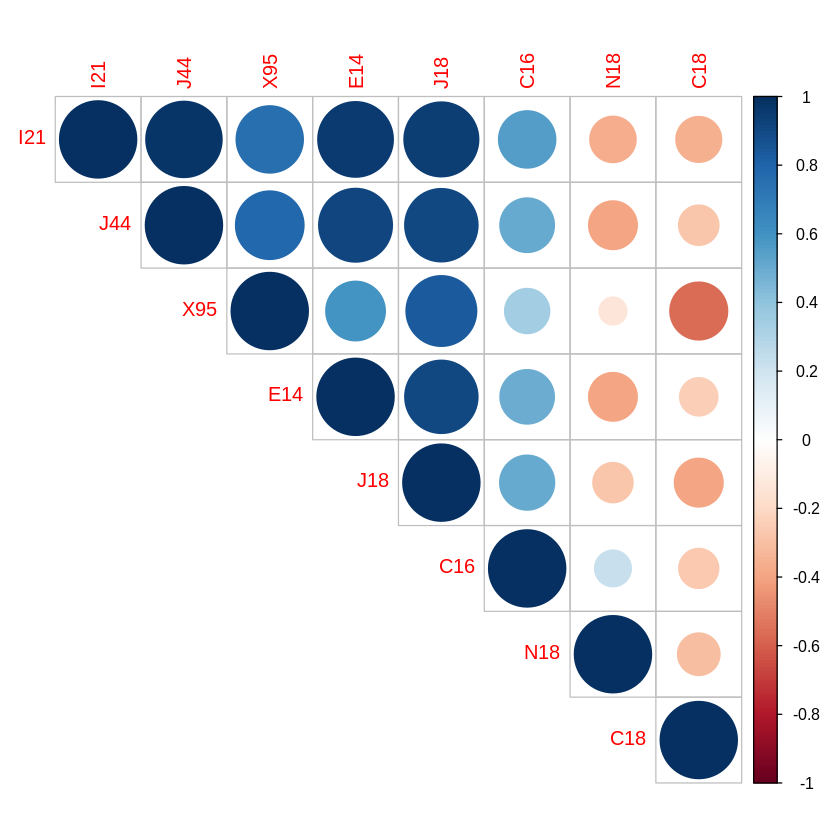

In [98]:
corrplot(cor(datos), type="upper")

In [166]:
datos_est = scale(datos) ## Normalización de los datos
datos_est

,I21,J44,X95,E14,J18,C16,N18,C18
1,1.6772964,1.8420187,2.69384018,1.119765764,2.0393616,0.8546393,-0.18214079,-1.2043756
2,0.2884039,-0.3050429,-0.05592748,0.378808778,0.5400148,1.0781348,0.98977281,-1.2318336
3,1.8938912,1.8933180,0.29361926,2.167628009,1.2447078,1.3274892,-1.00577484,0.1359170
4,-0.3497043,-0.3563422,-0.40741614,0.032444270,0.1251955,-0.8834536,-1.31640254,1.1381332
5,-0.3094212,-0.2562461,-0.62102804,-0.590134972,-0.6869507,-0.6802759,-1.13598746,1.1655912
6,-0.8617088,-0.7041762,-0.55694447,-0.897040232,-0.9293451,0.5757317,0.30262668,0.9785337
7,-0.4833976,-0.4264094,0.11496204,-0.633978580,-0.7194366,-1.2935031,-0.00643219,-1.1803499
8,-0.6497845,-0.5415200,-0.51616401,-0.555060085,-0.5145259,-0.3921330,1.67378128,0.8429600
9,-0.3082536,-0.3388253,-0.29090056,-0.002630617,-0.1871685,-1.2343969,-0.30294045,-0.1094887
10,-0.8973215,-0.8067747,-0.65404078,-1.019802336,-0.9118528,0.6477675,0.98349750,-0.5350874


In [100]:
P = cor(datos_est);
P

,I21,J44,X95,E14,J18,C16,N18,C18
I21,1.0000000,0.9760498,0.7588066,0.9577730,0.9401470,0.5512442,-0.3608247,-0.3536774
J44,0.9760498,1.0000000,0.7875891,0.9129968,0.9020843,0.5002232,-0.3987847,-0.2736738
X95,0.7588066,0.7875891,1.0000000,0.5962213,0.8395437,0.3425128,-0.1319865,-0.5619026
E14,0.9577730,0.9129968,0.5962213,1.0000000,0.9001612,0.4977340,-0.3977895,-0.2469945
J18,0.9401470,0.9020843,0.8395437,0.9001612,1.0000000,0.5079832,-0.2723578,-0.3995470
C16,0.5512442,0.5002232,0.3425128,0.4977340,0.5079832,1.0000000,0.2276986,-0.2696917
N18,-0.3608247,-0.3987847,-0.1319865,-0.3977895,-0.2723578,0.2276986,1.0000000,-0.3041495
C18,-0.3536774,-0.2736738,-0.5619026,-0.2469945,-0.3995470,-0.2696917,-0.3041495,1.0000000


In [101]:
EIG = eigen(P)
VP = EIG$values; print(VP)

[1] 5.011565816 1.519427764 0.834036588 0.309490377 0.227004726 0.087925861
[7] 0.007412016 0.003136851


In [102]:
e = EIG$vectors; print(e)

           [,1]         [,2]        [,3]        [,4]        [,5]        [,6]
[1,]  0.4403602  0.076468110 -0.06344756  0.08393883 -0.14084554 -0.22995346
[2,]  0.4307582  0.128125449 -0.03978966 -0.14158002 -0.01880215 -0.64276029
[3,]  0.3736901 -0.149976314  0.39387642 -0.59201035  0.34599738  0.01514218
[4,]  0.4132135  0.157638429 -0.15559678  0.28718422 -0.50346603  0.07782131
[5,]  0.4323549  0.004917871  0.04104560 -0.17380693 -0.18307351  0.70603068
[6,]  0.2576385 -0.339137982 -0.71240898  0.13555856  0.52574222  0.09600806
[7,] -0.1355616 -0.711158083 -0.19610390 -0.36301116 -0.53502870 -0.13537098
[8,] -0.1961004  0.556425334 -0.51708236 -0.59966346 -0.10217770  0.04090224
            [,7]         [,8]
[1,]  0.74126282  0.408628929
[2,] -0.13593408 -0.586882196
[3,] -0.24903921  0.387664750
[4,] -0.56721549  0.341250621
[5,]  0.20176214 -0.456561381
[6,] -0.07966945  0.027120201
[7,]  0.03234537  0.004021713
[8,]  0.01400030  0.112497853


In [103]:
PROP_VAR = 100 * VP / sum(VP); print(round(PROP_VAR, 2))

[1] 62.64 18.99 10.43  3.87  2.84  1.10  0.09  0.04


In [104]:
corr_1 = e[,1]*sqrt(VP[1])
corr_2 = e[,2]*sqrt(VP[2])
corr_3 = e[,3]*sqrt(VP[3])
print(cbind(corr_1, corr_2, corr_3))

         corr_1       corr_2      corr_3
[1,]  0.9858135  0.094258470 -0.05794387
[2,]  0.9643181  0.157933925 -0.03633814
[3,]  0.8365622 -0.184868410  0.35971002
[4,]  0.9250415  0.194313121 -0.14209970
[5,]  0.9678924  0.006062017  0.03748514
[6,]  0.5767631 -0.418038673 -0.65061180
[7,] -0.3034752 -0.876609514 -0.17909307
[8,] -0.4390007  0.685878082 -0.47222858


In [105]:
contrib_1 = (e[,1]*sqrt(VP[1]))^2 / sum((e[,1]*sqrt(VP[1]))^2) * 100
contrib_2 = (e[,2]*sqrt(VP[2]))^2 / sum((e[,2]*sqrt(VP[2]))^2) * 100
contrib_3 = (e[,3]*sqrt(VP[3]))^2 / sum((e[,3]*sqrt(VP[3]))^2) * 100

print(cbind(contrib_1, contrib_2, contrib_3))

     contrib_1    contrib_2  contrib_3
[1,] 19.391708  0.584737187  0.4025593
[2,] 18.555265  1.641613062  0.1583217
[3,] 13.964426  2.249289488 15.5138634
[4,] 17.074539  2.484987435  2.4210358
[5,] 18.693073  0.002418545  0.1684741
[6,]  6.637760 11.501457067 50.7526556
[7,]  1.837693 50.574581938  3.8456738
[8,]  3.845537 30.960915277 26.7374163


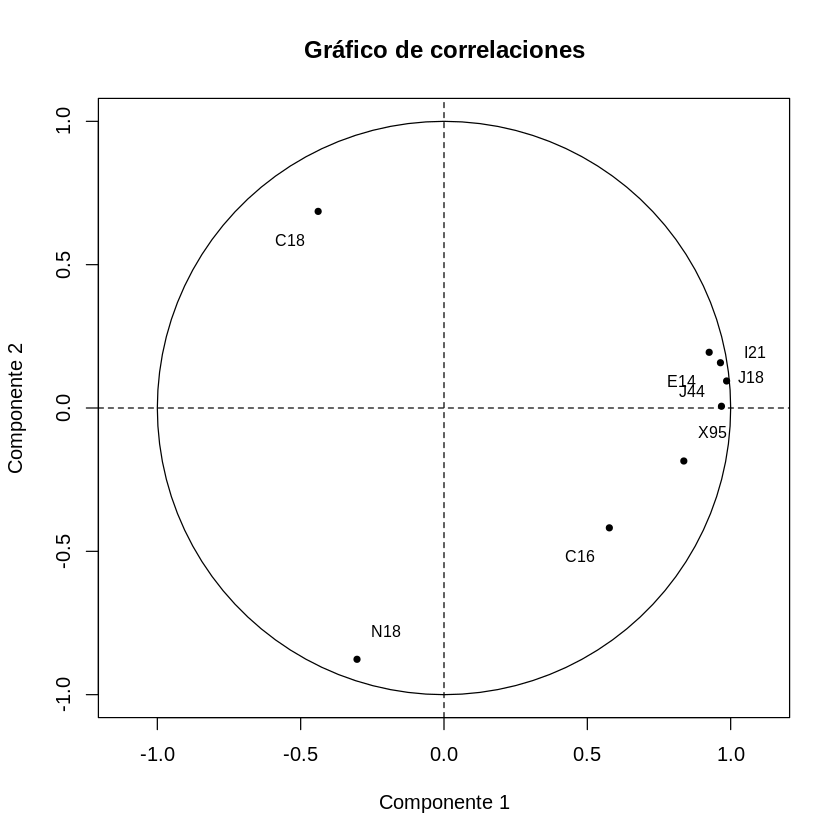

In [106]:
plot(corr_1, corr_2, pch = 20, asp = 1, xlim = c(-1,1), ylim = c(-1,1), main = 'Gráfico de correlaciones', xlab = 'Componente 1', ylab = 'Componente 2')
draw.circle(0,0,1)
abline(h = 0, v = 0, lty = 2)
text(jitter(cbind(corr_1, corr_2)+c(.1,-.1)), colnames(P), cex = 0.8)

## Utilizando la libreria PCA

In [138]:
datos = data[, -c(1)]
rownames(datos) = unclass(data$Departamentos); print(head(datos))

              I21  J44  X95 E14  J18  C16  N18  C18
05 Antioquia 4529 2151 1818 523 1226 1467  776  254
08 Atlántico 2150  435  402 354  626 1588 1523  238
11 Bogotá    4900 2192  582 762  908 1723  251 1035
13 Bolívar   1057  394  221 275  460  526   53 1619
17 Caldas    1126  474  111 133  135  636  168 1635
18 Caquetá    180  116  144  63   38 1316 1085 1526


In [139]:
res.pca = FactoMineR::PCA(datos, scale.unit = TRUE, graph = F)

In [140]:
print(res.pca$eig)

        eigenvalue percentage of variance cumulative percentage of variance
comp 1 5.011565816            62.64457270                          62.64457
comp 2 1.519427764            18.99284705                          81.63742
comp 3 0.834036588            10.42545735                          92.06288
comp 4 0.309490377             3.86862972                          95.93151
comp 5 0.227004726             2.83755908                          98.76907
comp 6 0.087925861             1.09907326                          99.86814
comp 7 0.007412016             0.09265020                          99.96079
comp 8 0.003136851             0.03921064                         100.00000


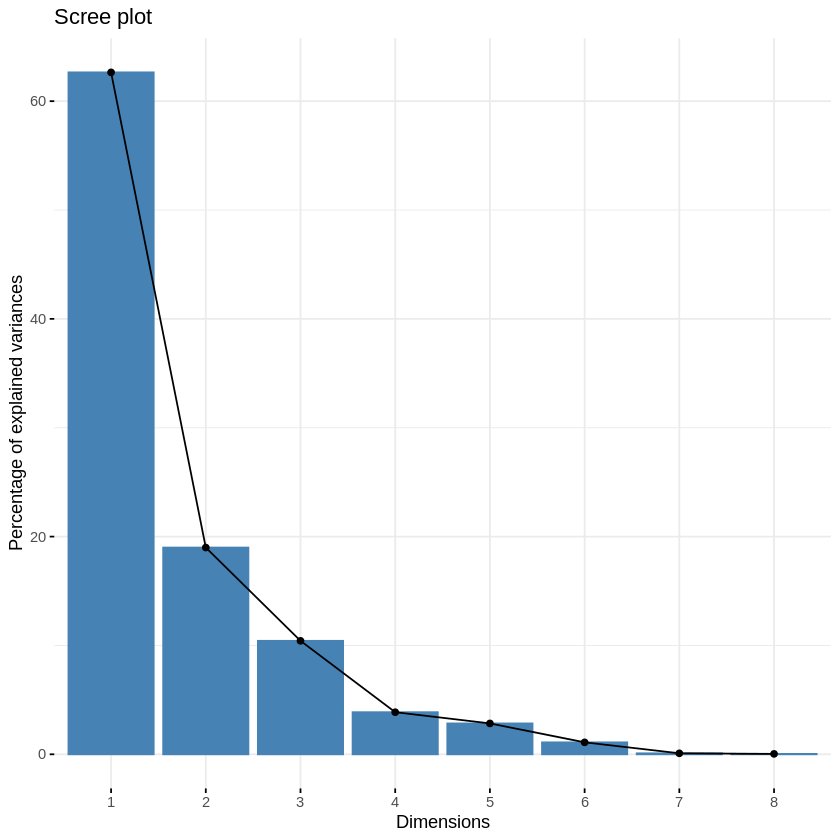

In [141]:
factoextra::fviz_screeplot(res.pca, ncp = 10)

In [142]:
print(res.pca$var$coord)

         Dim.1        Dim.2       Dim.3       Dim.4        Dim.5
I21  0.9858135 -0.094258470  0.05794387 -0.04669673  0.067105874
J44  0.9643181 -0.157933925  0.03633814  0.07876360  0.008958287
X95  0.8365622  0.184868410 -0.35971002  0.32934637 -0.164850496
E14  0.9250415 -0.194313121  0.14209970 -0.15976592  0.239876458
J18  0.9678924 -0.006062017 -0.03748514  0.09669203  0.087225396
C16  0.5767631  0.418038673  0.65061180 -0.07541375 -0.250489949
N18 -0.3034752  0.876609514  0.17909307  0.20194986  0.254914492
C18 -0.4390007 -0.685878082  0.47222858  0.33360393  0.048682581


In [143]:
print(res.pca$var$contrib)

        Dim.1        Dim.2      Dim.3      Dim.4       Dim.5
I21 19.391708  0.584737187  0.4025593  0.7045726  1.98374653
J44 18.555265  1.641613062  0.1583217  2.0044902  0.03535209
X95 13.964426  2.249289488 15.5138634 35.0476256 11.97141860
E14 17.074539  2.484987435  2.4210358  8.2474774 25.34780480
J18 18.693073  0.002418545  0.1684741  3.0208848  3.35159089
C16  6.637760 11.501457067 50.7526556  1.8376124 27.64048806
N18  1.837693 50.574581938  3.8456738 13.1777102 28.62557069
C18  3.845537 30.960915277 26.7374163 35.9596267  1.04402834


In [144]:
print(res.pca$ind$coord)

                  Dim.1      Dim.2       Dim.3       Dim.4         Dim.5
05 Antioquia  4.6003008  0.7206309 -0.88588945  0.88909259 -0.4152089052
08 Atlántico  0.7904283  1.7932397  0.41128316 -0.67564479  0.1904591490
11 Bogotá     3.8419893 -1.0876990  1.24888134 -0.61855695  0.3139143851
13 Bolívar   -0.7004990 -1.9643060 -0.18447550  0.07857040  0.0007512898
17 Caldas    -1.3380746 -1.7154084  0.04896679  0.05367683 -0.4083961424
18 Caquetá   -1.8425298  0.0891267  1.06540217  0.37695220 -0.6371594089
19 Cauca     -1.0831074  0.4488787 -1.78683019 -0.45274662 -0.0113551934
20 Cesar     -1.7469882  0.7589242  0.59033385  0.95767069  0.9392534300
23 Córdoba   -0.7672756 -0.5781239 -0.95564620 -0.24706071  0.5175377886
27 Chocó     -1.7542438  1.5347372  0.44797404 -0.36195364 -0.4897963926


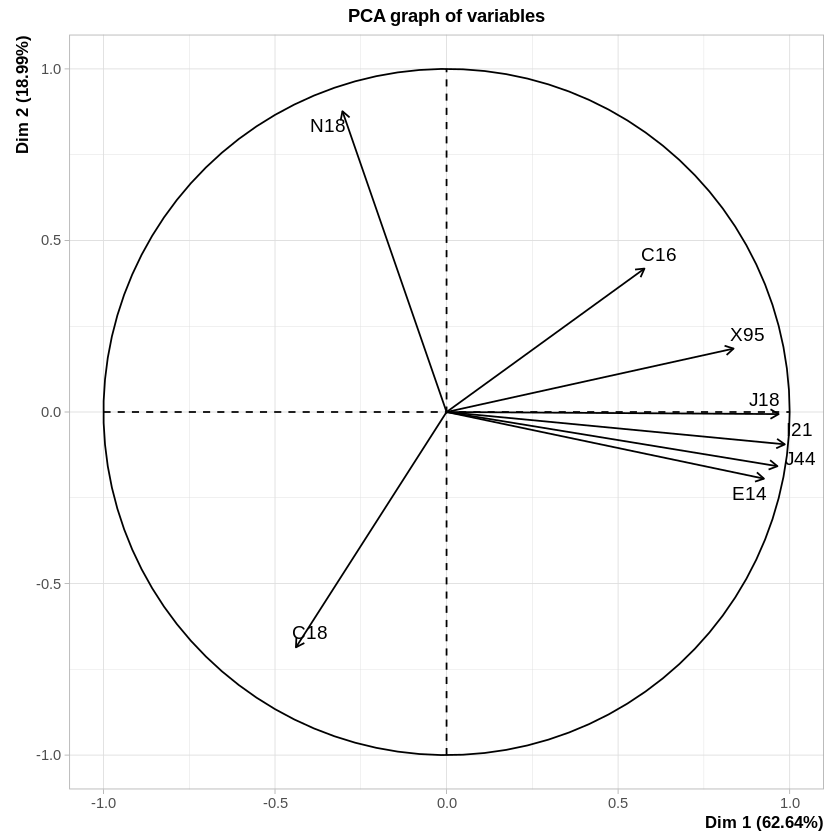

In [145]:
FactoMineR::plot.PCA(res.pca, axes = c(1,2), choix = "var")

La grafica indica la clasificación por cuadrantes de los diferentes departamentos,esto permite estimar un modelo que es capaz de establecer una separación con base a la correlación de las causas de mortalidad(enfermedades)

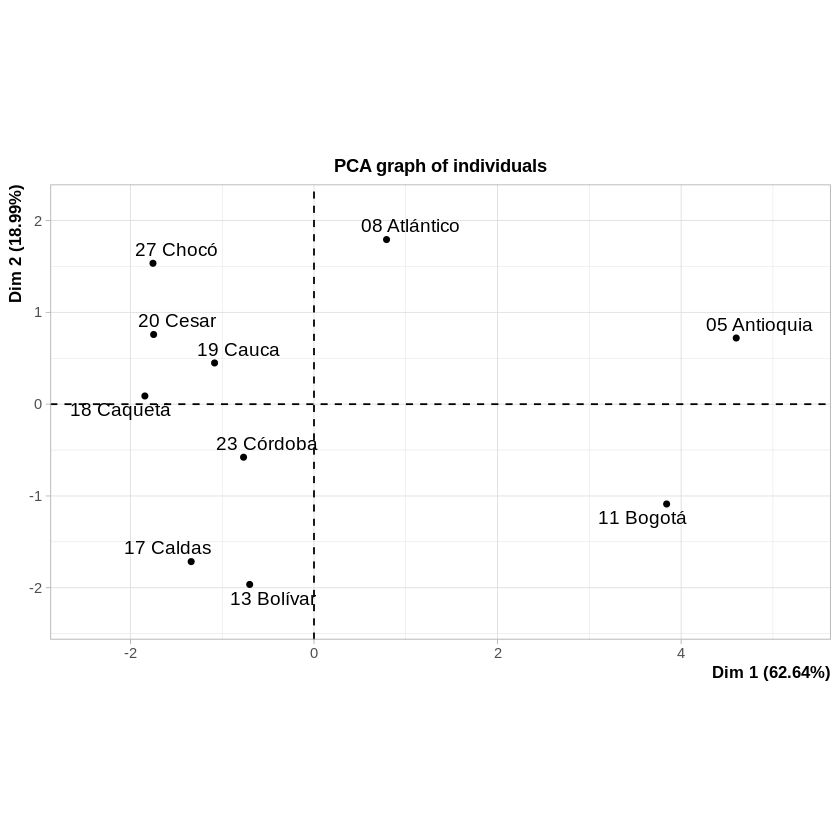

In [146]:
FactoMineR::plot.PCA(res.pca, axes = c(1,2), choix = "ind")

Este grafico inidica por cuadrante las tendencias de las diferentes causas de mortalidad para cada uno de los cuatro cuadrantes, Por ejemplo se puede observar que para Bogota existe una alta probablidad de encontrar personas con (Infarto al miocardio,Enfermedades pulmonares,Diabetis)

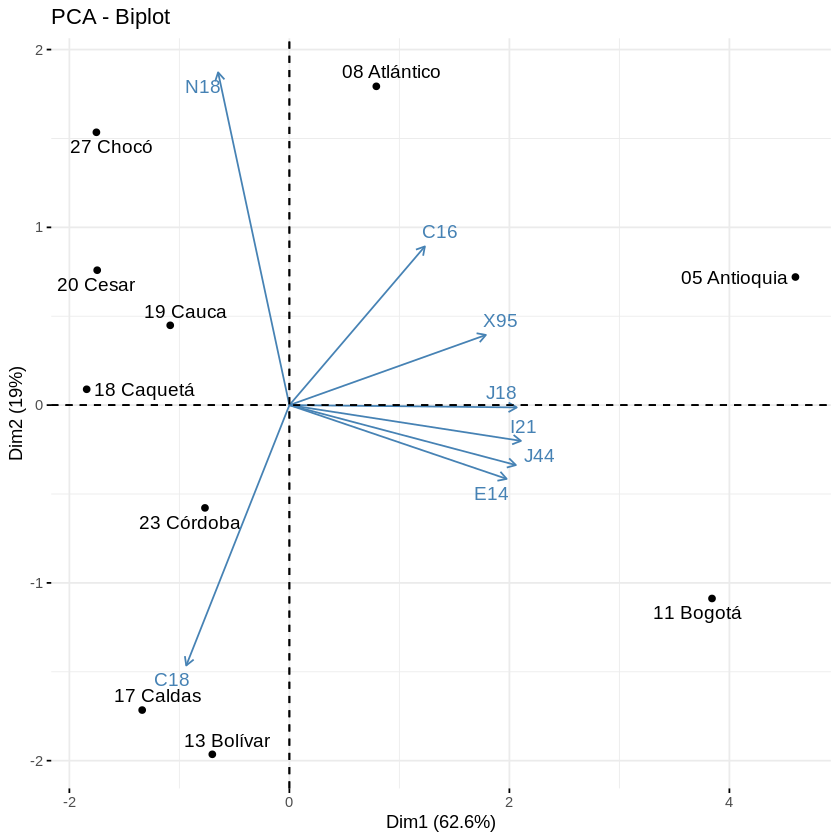

In [147]:
factoextra::fviz_pca_biplot(res.pca, axes = c(1, 2), repel = TRUE)

##AGRUPACIÓN DE CONGLOMERADOS - CLUSTERS

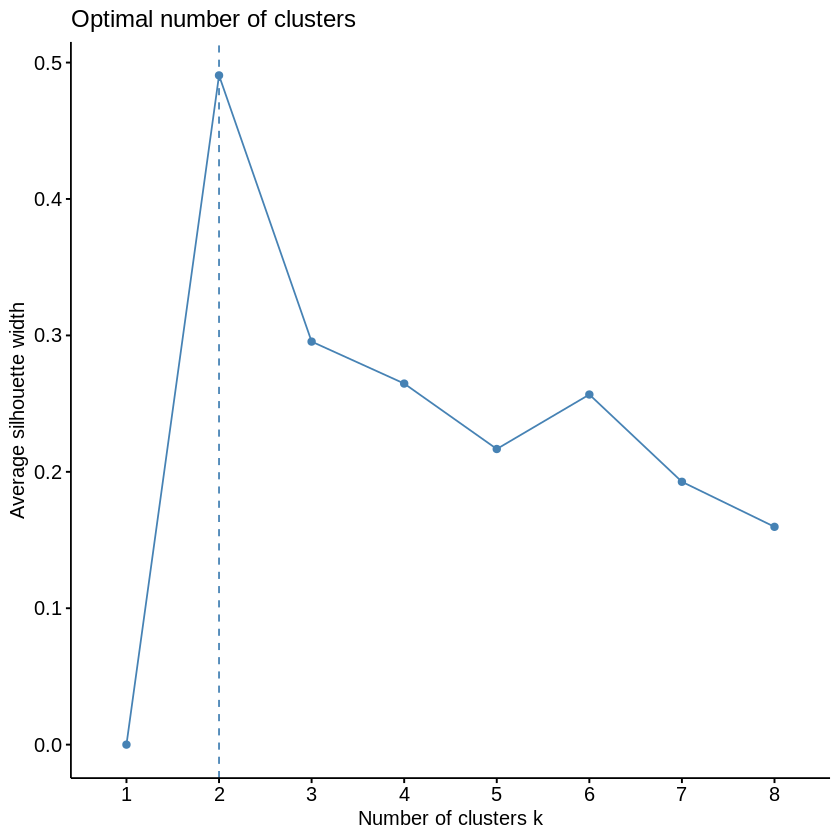

In [148]:
factoextra::fviz_nbclust(scale(datos), hcut, method = "silhouette",k.max=8) ## method = c('silhouette', 'wss', 'gap_stat')

In [149]:
set.seed(123)
km.res <- kmeans(scale(datos), 3, iter.max = 10000)
#?kmeans

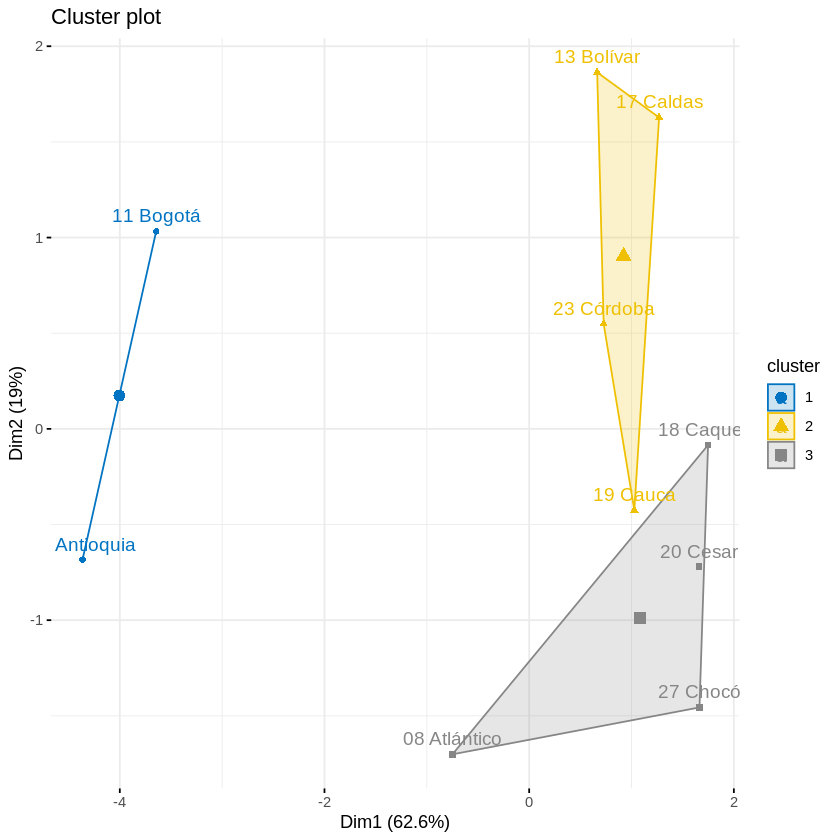

In [150]:
fviz_cluster(km.res, data = datos, 
             ellipse.type = "convex", # c("t", "norm", "euclid") o "convex" o "confidence"
             palette = "jco",
             ggtheme = theme_minimal())

In [151]:
grupo1 = as.factor(km.res$cluster) ; print(grupo1)

05 Antioquia 08 Atlántico    11 Bogotá   13 Bolívar    17 Caldas   18 Caquetá 
           1            3            1            2            2            3 
    19 Cauca     20 Cesar   23 Córdoba     27 Chocó 
           2            3            2            3 
Levels: 1 2 3


In [152]:
DF = as.data.frame(grupo1); print(DF)

             grupo1
05 Antioquia      1
08 Atlántico      3
11 Bogotá         1
13 Bolívar        2
17 Caldas         2
18 Caquetá        3
19 Cauca          2
20 Cesar          3
23 Córdoba        2
27 Chocó          3


In [155]:
RES = data.frame(datos, DF)

In [156]:
print(head(RES))

              I21  J44  X95 E14  J18  C16  N18  C18 grupo1         pais
05 Antioquia 4529 2151 1818 523 1226 1467  776  254      1 05 Antioquia
08 Atlántico 2150  435  402 354  626 1588 1523  238      3 08 Atlántico
11 Bogotá    4900 2192  582 762  908 1723  251 1035      1    11 Bogotá
13 Bolívar   1057  394  221 275  460  526   53 1619      2   13 Bolívar
17 Caldas    1126  474  111 133  135  636  168 1635      2    17 Caldas
18 Caquetá    180  116  144  63   38 1316 1085 1526      3   18 Caquetá


In [157]:
m = apply(datos, 2 , function(x) tapply(x, grupo1, mean)) ; print(m)

      I21     J44     X95    E14     J18     C16    N18     C18
1 4714.50 2171.50 1200.00 642.50 1067.00 1595.00  513.5  644.50
2 1034.75  403.50  275.75 199.50  263.00  450.50  452.0 1103.50
3  748.00  207.75  201.25 148.25  228.25 1262.75 1521.5  963.75


## CLUSTER SUPERVISADO O JERÁRQUICO

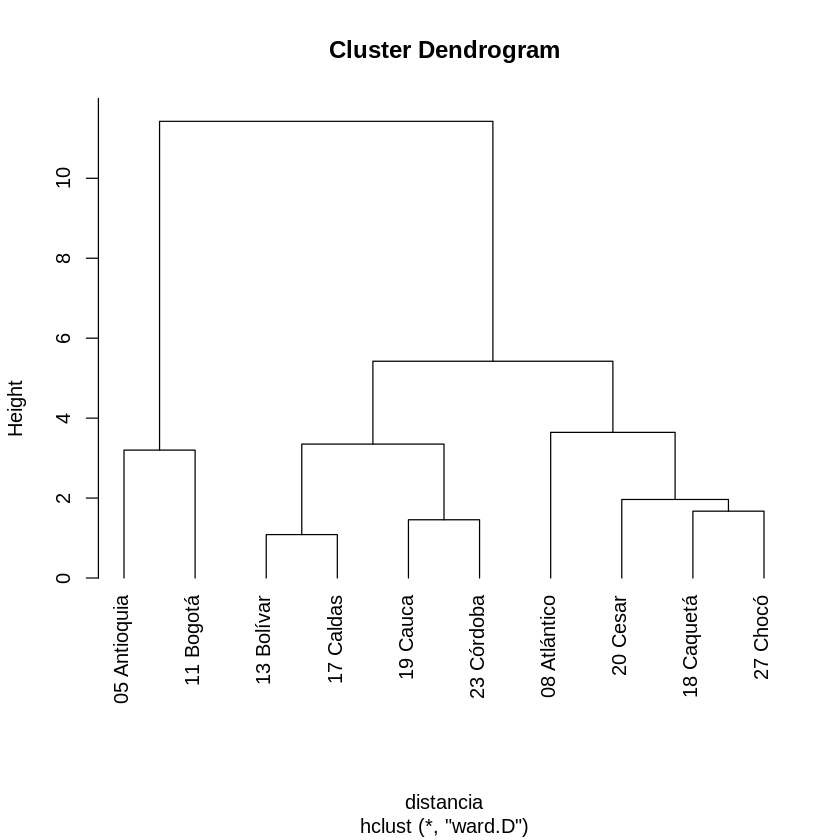

In [158]:
distancia = get_dist(datos, stand = TRUE, method = "euc")
d4 = hclust(distancia, method = "ward.D")
plot(d4, hang = -1)


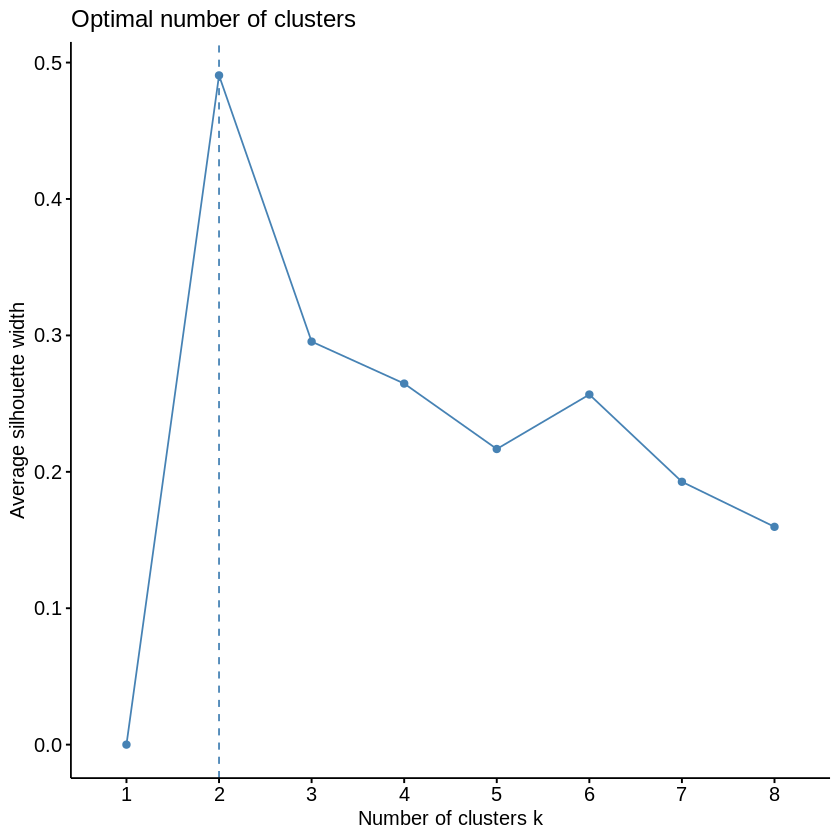

In [159]:
fviz_nbclust(scale(datos), hcut, method = "sil", hcmethod = "mcquitty",k.max = 8) 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


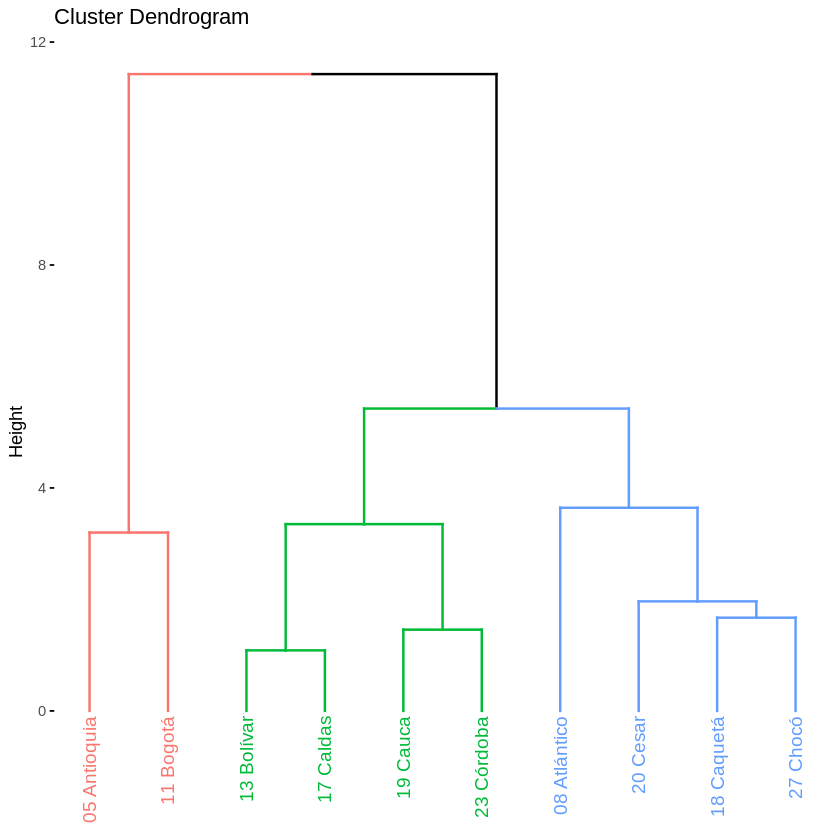

In [160]:
fviz_dend(d4, k = 3)

In [161]:
grupo_sup = as.factor(cutree(d4, k = 3))

In [162]:
DF = as.data.frame(grupo_sup)
DF

,grupo_sup
,<fct>
05 Antioquia,1
08 Atlántico,2
11 Bogotá,1
13 Bolívar,3
17 Caldas,3
18 Caquetá,2
19 Cauca,3
20 Cesar,2
23 Córdoba,3
